In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data_download/gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global city,sector 92,0.78,7723.0,1010.0,Super Built up area 1010(93.83 sq.m.)Carpet ar...,2,2,3,2.0,NaN,Under Construction,1010.0,NaN,700.0,0,0,0,0,1,0,24,505.000000
1,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,0,31,730.333333
2,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet a...,3,4,3+,3.0,North-East,Old Property,3200.0,NaN,3156.0,0,1,0,1,0,2,143,1066.666667
3,flat,pioneer park,sector 61,2.00,11765.0,1700.0,Super Built up area 1700(157.94 sq.m.),3,3,3,24.0,North-West,Moderately Old,1700.0,NaN,NaN,0,0,0,0,0,2,75,566.666667
4,flat,dlf the primus,sector 82a,1.80,13846.0,1300.0,Super Built up area 1818(168.9 sq.m.)Carpet ar...,3,3,3+,10.0,North-East,Relatively New,1818.0,NaN,1300.0,0,1,0,0,0,1,174,433.333333


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

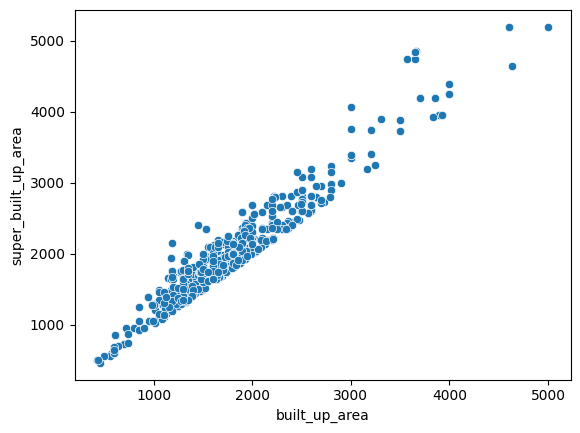

In [6]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

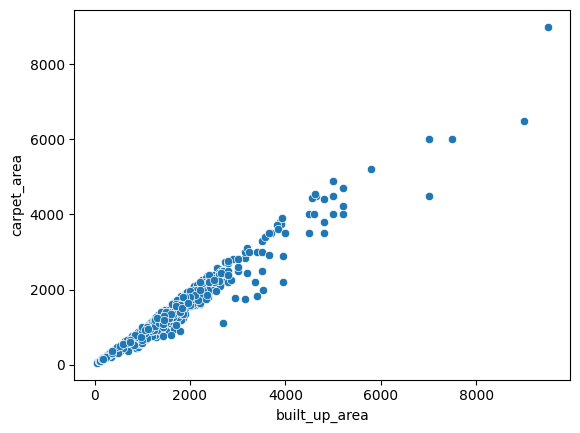

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(531, 24)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global city,sector 92,0.78,7723.0,1010.0,Super Built up area 1010(93.83 sq.m.)Carpet ar...,2,2,3,2.0,NaN,Under Construction,1010.0,NaN,700.0,0,0,0,0,1,0,24,505.000000
2,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet a...,3,4,3+,3.0,North-East,Old Property,3200.0,NaN,3156.0,0,1,0,1,0,2,143,1066.666667
4,flat,dlf the primus,sector 82a,1.80,13846.0,1300.0,Super Built up area 1818(168.9 sq.m.)Carpet ar...,3,3,3+,10.0,North-East,Relatively New,1818.0,NaN,1300.0,0,1,0,0,0,1,174,433.333333
6,flat,mm woodshire,sector 107,0.80,5857.0,1366.0,Super Built up area 1366(126.91 sq.m.)Carpet a...,2,2,3+,6.0,West,Relatively New,1366.0,NaN,1055.0,0,0,0,1,0,2,174,683.000000
8,flat,puri emerald bay,sector 104,2.25,10465.0,2150.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,4.0,North,Relatively New,2450.0,NaN,2150.0,0,1,0,0,0,2,159,716.666667


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/lp/tw6wpzqs11l54033wwlhzq500000gn/T/ipykernel_7871/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,0,31,730.333333
3,flat,pioneer park,sector 61,2.00,11765.0,1700.0,Super Built up area 1700(157.94 sq.m.),3,3,3,24.0,North-West,Moderately Old,1700.0,NaN,NaN,0,0,0,0,0,2,75,566.666667
5,flat,maruti vihar,sector 28,1.00,9091.0,1100.0,Super Built up area 1100(102.19 sq.m.),1,1,1,1.0,North,Old Property,1100.0,NaN,NaN,1,0,0,1,0,2,80,1100.000000
7,flat,bestech park view residency,sector 2,1.51,7869.0,1919.0,Super Built up area 1920(178.37 sq.m.),3,4,3+,7.0,South-West,Moderately Old,1920.0,NaN,NaN,0,1,0,0,0,2,84,639.666667
9,flat,ss the leaf,sector 85,1.65,6852.0,2408.0,Super Built up area 2408(223.71 sq.m.),3,4,3,9.0,NaN,New Property,2408.0,NaN,NaN,0,0,0,1,0,0,21,802.666667


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/lp/tw6wpzqs11l54033wwlhzq500000gn/T/ipykernel_7871/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
16,flat,sanskriti apartment,sector 10a,1.10,6667.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,2.0,NaN,Moderately Old,NaN,NaN,1650.0,0,0,0,0,0,0,22,550.0
20,flat,global height,sohna road,0.45,6338.0,710.0,Carpet area: 710 (65.96 sq.m.),2,2,2,6.0,East,Relatively New,NaN,NaN,710.0,0,0,0,0,0,1,49,355.0
21,house,independent,sector 105,0.38,8444.0,450.0,Carpet area: 50 (4.65 sq.m.),2,2,2,1.0,NaN,Undefined,NaN,NaN,50.0,0,0,0,0,0,0,0,225.0
24,flat,pivotal riddhi siddhi,sector 99,0.50,8518.0,587.0,Carpet area: 587 (54.53 sq.m.),2,1,2,7.0,NaN,New Property,NaN,NaN,587.0,0,0,0,0,0,0,24,293.5
25,flat,signature signum a,sector 95,0.40,7782.0,514.0,Carpet area: 514 (47.75 sq.m.),2,2,2,3.0,East,New Property,NaN,NaN,514.0,0,0,0,0,0,2,44,257.0


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/lp/tw6wpzqs11l54033wwlhzq500000gn/T/ipykernel_7871/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

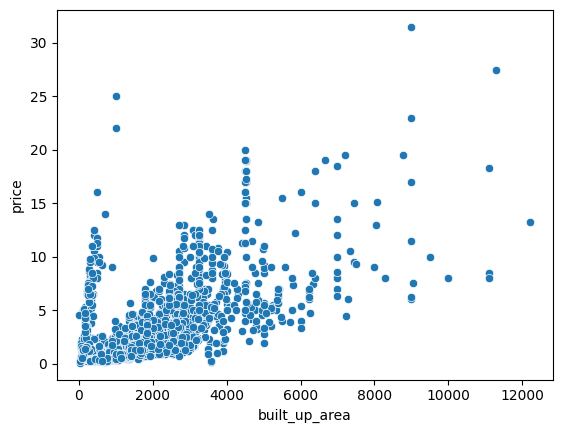

In [29]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
2670,9.50,4914.0,546.0
1928,8.00,3132.0,387.0
3314,3.65,1557.0,1557.0
3474,3.55,1449.0,1449.0
914,4.70,2380.0,1761.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

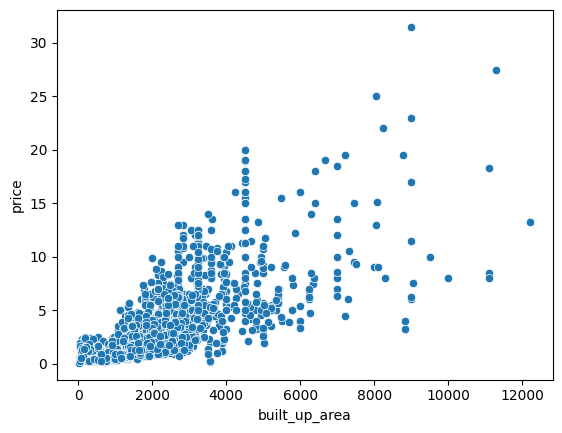

In [34]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [35]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global city,sector 92,0.78,7723.0,2,2,3,2.0,NaN,Under Construction,846.0,0,0,0,0,1,0,24
1,flat,bptp terra,sector 37d,1.72,7850.0,3,3,3+,10.0,South-East,Relatively New,1983.0,0,1,0,0,0,0,31
2,flat,ambience lagoon,sector 24,4.25,13281.0,3,4,3+,3.0,North-East,Old Property,3201.0,0,1,0,1,0,2,143
3,flat,pioneer park,sector 61,2.00,11765.0,3,3,3,24.0,North-West,Moderately Old,1538.0,0,0,0,0,0,2,75
4,flat,dlf the primus,sector 82a,1.80,13846.0,3,3,3+,10.0,North-East,Relatively New,1545.0,0,1,0,0,0,1,174


In [37]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [38]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
461,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
627,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
663,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
734,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
872,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
1027,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,1,0
1262,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1402,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
1685,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
1750,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28


In [39]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [40]:
df['floorNum'].fillna(2.0,inplace=True)

In [41]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [42]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='count'>

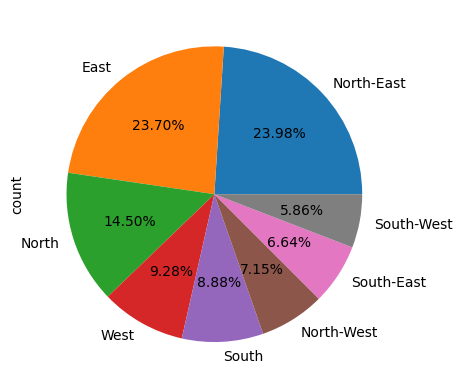

In [43]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.drop(columns=['facing'],inplace=True)

In [45]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
75,flat,assotech blith,sector 99,0.92,6740.0,2,2,3+,22.0,Under Construction,1235.0,0,0,0,0,0,0,56
2117,flat,suposhaa smartworld orchard,sector 61,2.17,14000.0,3,3,3,1.0,Under Construction,1721.0,0,0,0,0,0,0,0
989,flat,signature global solera,sector 107,0.40,6645.0,2,2,1,7.0,Relatively New,577.0,0,0,0,0,0,2,55
3373,flat,signature global solera,sector 107,0.25,7862.0,1,1,0,0.0,Undefined,318.0,0,0,0,0,0,0,55
1884,house,independent,sector 10a,4.25,17955.0,4,3,2,1.0,Undefined,2367.0,0,0,0,0,0,0,0


In [46]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [47]:
df.drop(index=[2536],inplace=True)

In [48]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [49]:
df['agePossession'].value_counts()

agePossession
Relatively New        1604
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     264
Name: count, dtype: int64

In [50]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
21,house,independent,sector 105,0.38,8444.0,2,2,2,1.0,Undefined,56.0,0,0,0,0,0,0,0
30,house,independent,sector 17,3.00,11111.0,4,4,0,1.0,Undefined,3000.0,0,0,0,0,0,0,0
40,flat,ramprasta awho,sector 95,0.92,5257.0,3,3,3+,13.0,Undefined,1750.0,0,0,0,0,0,0,0
52,flat,smart world orchard,sector 61,2.50,16139.0,3,3,1,1.0,Undefined,1549.0,0,0,0,0,0,0,61
57,house,independent,sector 6,1.00,4630.0,6,4,0,3.0,Undefined,240.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,flat,raheja navodaya,sector 92,1.10,4681.0,3,2,3,0.0,Undefined,2350.0,0,0,0,0,0,0,0
3520,flat,ramson kshitij sec- gurugram,sector 95,0.27,2700.0,2,2,0,1.0,Undefined,758.0,0,0,0,0,0,0,0
3523,flat,whiteland blissville,sector 76,1.92,11794.0,3,3,2,3.0,Undefined,1628.0,0,0,0,0,0,0,61
3527,house,independent,sector 3 phase 3 extension,0.85,8500.0,1,1,0,1.0,Undefined,1000.0,0,0,0,0,0,0,0


In [51]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1716
New Property           597
Moderately Old         584
Old Property           326
Under Construction     278
Undefined               53
Name: count, dtype: int64

In [54]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1725
New Property           598
Moderately Old         591
Old Property           329
Under Construction     278
Undefined               33
Name: count, dtype: int64

In [57]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [59]:
df['agePossession'].value_counts()

agePossession
Relatively New        1727
Moderately Old         622
New Property           598
Old Property           329
Under Construction     278
Name: count, dtype: int64

In [60]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [61]:
df.to_csv('data_download/gurgaon_properties_missing_value_imputation.csv',index=False)

In [62]:
df.shape

(3554, 18)